# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

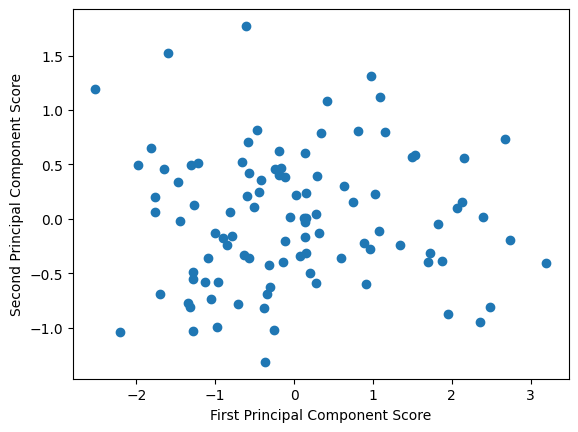

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The first PC score for the outliers is very low, while the second PC score is quite high, thus the outliers are in the top left corner of the graph. This suggests that these outliers have a low value to series 3, and higher value in series 1 & 2, since the vector component show that the first component is dominated by series 3. Furthermore, the second principle component have higher vector value for both series 1 & 2, which suggests that these data series are highly correlated. This makes sense as the values in series 2 are created by multiplying a normal distribution by the values in series 1, also a normal distribution, and is backed up by the pairplot shown below.

The disadvantages of the graph above lie in its difficulty to read, as well as the lack of information about the relationships between the original data (series). The advantages of this plot above include the ability to see specific patterns in the data, like clustering or spread, as well as outliers. However for this data case there doesn't appear to be any apparent patterns.

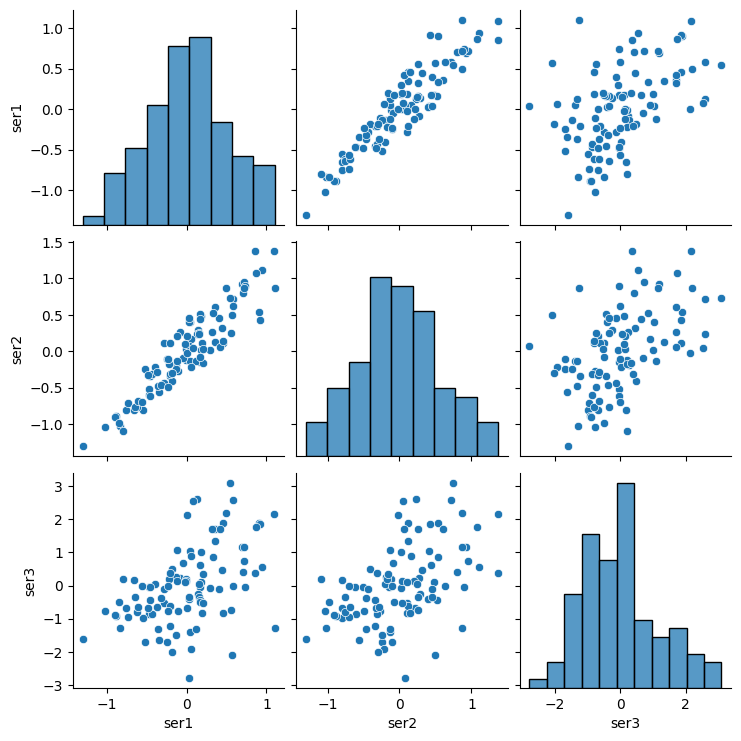

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [32]:
# UNSW used due to the large amount of numeric variables
# Data

UNSW_data = pd.read_csv("UNSW_NB15_training-set.csv", header=0)
UNSW_numeric_columns = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 
    'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',	'djit',	'swin',	'stcpb',	
    'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',	'dmean', 'trans_depth',	
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',	
    'ct_dst_sport_ltm',	'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',	'ct_src_ltm',
    'ct_srv_dst', 'rate' ]
for column in UNSW_data.columns:
    if column in UNSW_numeric_columns:
        UNSW_data[column] = UNSW_data[column].astype('int')
    else:
        UNSW_data[column] = UNSW_data[column].astype('category')

UNSW_data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0,udp,-,INT,2,0,496,0,90909,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0,udp,-,INT,2,0,1762,0,125000,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0,udp,-,INT,2,0,1068,0,200000,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0,udp,-,INT,2,0,900,0,166666,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0,udp,-,INT,2,0,2126,0,100000,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0,udp,-,INT,2,0,784,0,333333,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0,udp,-,INT,2,0,1960,0,166666,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0,udp,-,INT,2,0,1384,0,35714,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0,arp,-,INT,1,0,46,0,0,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0,arp,-,INT,1,0,46,0,0,...,2,2,0,0,0,2,2,1,Normal,0


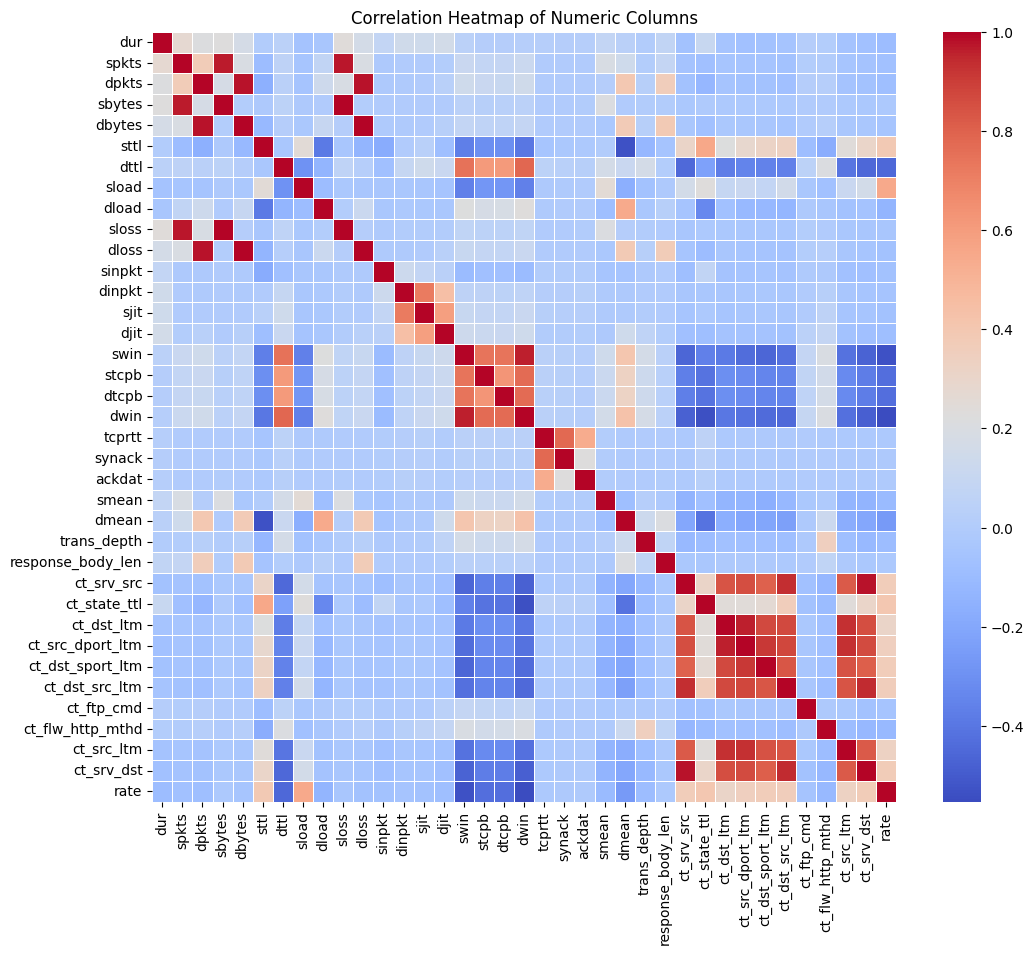

In [ ]:
# Correlation Heat Map

numeric_data = UNSW_data[UNSW_numeric_columns]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [76]:
# Correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_correlation_pairs = []
low_correlation_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], abs(corr_matrix.iloc[i, j])))  # Use abs() here
        if abs(corr_matrix.iloc[i, j]) < 0.3:
            low_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], abs(corr_matrix.iloc[i, j])))  # Use abs() here

sorted_high_correlation_pairs = sorted(high_correlation_pairs, key=lambda x: x[2], reverse=True)
sorted_low_correlation_pairs = sorted(low_correlation_pairs, key=lambda x: x[2], reverse=True)

print("High Corr Pairs:")
for pair in sorted_high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
#print("Low Corr Pairs:")
#for pair in sorted_low_correlation_pairs:
#    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

High Corr Pairs:
dloss and dbytes: 1.00
sloss and sbytes: 1.00
dloss and dpkts: 0.98
ct_srv_dst and ct_srv_src: 0.98
dbytes and dpkts: 0.98
sloss and spkts: 0.97
sbytes and spkts: 0.97
ct_src_dport_ltm and ct_dst_ltm: 0.96
dwin and swin: 0.96
ct_srv_dst and ct_dst_src_ltm: 0.94
ct_dst_src_ltm and ct_srv_src: 0.93
ct_src_ltm and ct_src_dport_ltm: 0.93
ct_src_ltm and ct_dst_ltm: 0.93
ct_dst_sport_ltm and ct_src_dport_ltm: 0.91


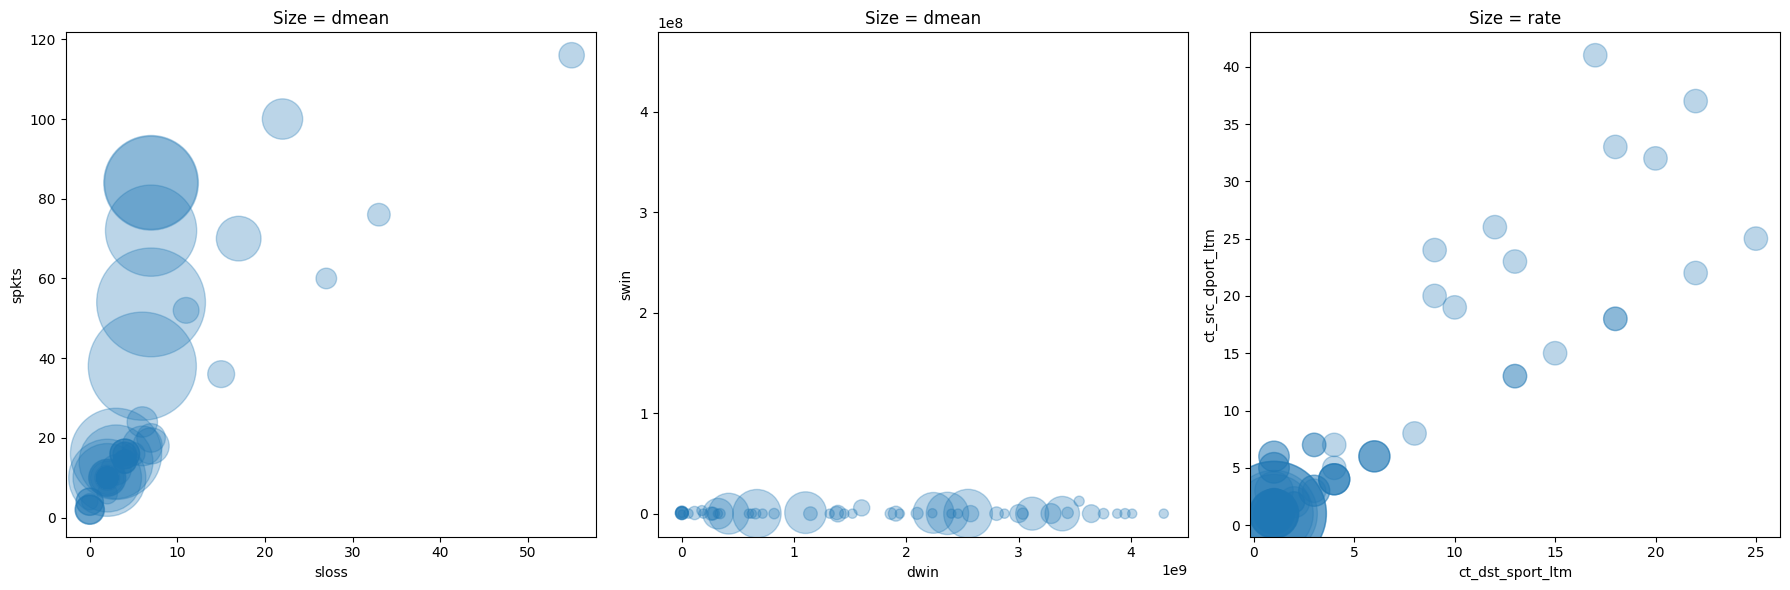

In [75]:
# Bubble Plots

sample_data = UNSW_data.sample(n=100, random_state=42)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(sample_data['sloss'], sample_data['spkts'], s=sample_data['dmean'] *5, alpha=0.3)
axes[0].set_title("Size = dmean")
axes[0].set_xlabel("sloss")
axes[0].set_ylabel("spkts")

axes[1].scatter(sample_data['stcpb'], sample_data['sload'], s=sample_data['dmean'], alpha=0.3)
axes[1].set_title("Size = dmean")
axes[1].set_xlabel("dwin")
axes[1].set_ylabel("swin")

axes[2].scatter(sample_data['ct_dst_sport_ltm'], sample_data['ct_src_dport_ltm'], s=sample_data['smean'] *5, alpha=0.3)
axes[2].set_title("Size = rate")
axes[2].set_xlabel("ct_dst_sport_ltm")
axes[2].set_ylabel("ct_src_dport_ltm")

plt.tight_layout()
plt.show()

In [103]:
# PCA 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(UNSW_data[UNSW_numeric_columns])
pca = PCA()
pca.fit(scaled_data)

pca_components_df = pd.DataFrame(
    pca.components_,
    columns=UNSW_numeric_columns,
    index=[f"PC{i+1}" for i in range(len(UNSW_numeric_columns))]
)

pca_components_df.head(5)

,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,sloss,...,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,rate
PC1,-0.032336,-0.054156,-0.071109,-0.028632,-0.052386,0.163120,-0.214036,0.109261,-0.075134,-0.035956,...,0.171607,0.273604,0.281393,0.275177,0.285776,-0.026933,-0.066875,0.273863,0.289480,0.197933
PC2,0.136599,0.306319,0.424496,0.226522,0.388362,-0.105410,-0.008798,-0.063989,0.124392,0.232383,...,-0.081628,0.159316,0.149893,0.132046,0.131324,0.000990,0.025292,0.149224,0.136033,-0.042358
PC3,0.156667,0.364594,0.047408,0.393008,-0.006295,0.131866,-0.118540,0.177639,-0.129965,0.386567,...,0.169085,-0.182563,-0.171952,-0.147213,-0.142596,-0.024186,-0.094833,-0.165422,-0.138242,0.139430
PC4,-0.041854,-0.253267,0.262825,-0.320067,0.333876,-0.019357,-0.212738,0.123910,0.050266,-0.323371,...,0.052689,-0.146482,-0.147490,-0.125993,-0.132939,-0.025388,-0.060695,-0.131325,-0.104935,0.123002
PC5,0.205143,-0.063236,0.067549,-0.069704,0.092120,0.114734,0.055142,0.027432,-0.168161,-0.071676,...,0.136292,-0.023969,-0.011772,-0.000784,0.001137,-0.003270,0.031344,-0.026965,-0.018539,0.033361


In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Best targets
results = []
for target in UNSW_numeric_columns:
    features = [col for col in UNSW_numeric_columns if col != target]
    
    X = UNSW_data[features]
    y = UNSW_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results.append((target, r2))

results.sort(key=lambda x: x[1], reverse=True)
for target, r2 in results:
    print(f"{target}: R² = {r2:.3f}")

dloss: R² = 0.997
dbytes: R² = 0.996
dpkts: R² = 0.996
sloss: R² = 0.993
sbytes: R² = 0.990
spkts: R² = 0.985
dwin: R² = 0.979
swin: R² = 0.968
ct_srv_dst: R² = 0.965
ct_src_dport_ltm: R² = 0.962
ct_srv_src: R² = 0.959
ct_dst_ltm: R² = 0.944
ct_dst_src_ltm: R² = 0.924
ct_src_ltm: R² = 0.894
ct_dst_sport_ltm: R² = 0.849
dttl: R² = 0.805
ct_state_ttl: R² = 0.727
sttl: R² = 0.614
dmean: R² = 0.606
stcpb: R² = 0.602
dtcpb: R² = 0.597
sjit: R² = 0.585
tcprtt: R² = 0.567
rate: R² = 0.530
dinpkt: R² = 0.530
trans_depth: R² = 0.495
synack: R² = 0.450
sload: R² = 0.449
dload: R² = 0.422
djit: R² = 0.334
smean: R² = 0.250
ct_flw_http_mthd: R² = 0.202
dur: R² = 0.187
response_body_len: R² = 0.176
ackdat: R² = 0.163
sinpkt: R² = 0.160
ct_ftp_cmd: R² = 0.037


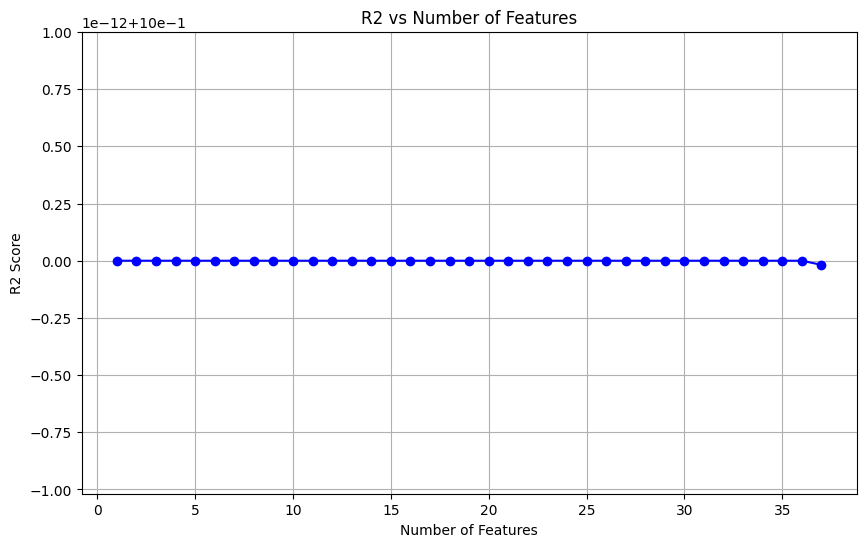

In [104]:
# forward feature selection for dloss
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def forward_feature_selection(X, y):
    selected_features = []
    r2_scores = []
    
    remaining_features = list(X.columns)  # all columns
    while remaining_features:
        scores_with_candidates = []
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            score = cross_val_score(LinearRegression(), X[current_features], y, cv=5, scoring='r2')
            scores_with_candidates.append((feature, score.mean()))
        best_feature, best_score = max(scores_with_candidates, key=lambda x: x[1])
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        r2_scores.append(best_score)
    
    return selected_features, r2_scores

selected_features, r2_scores = forward_feature_selection(UNSW_data[UNSW_numeric_columns], UNSW_data['dloss'])

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', color='b')
plt.title('R2 vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Conclusions:

The data from the UNSW dataset seems usable for predictive modeling, given the number of numeric features and related categorical variables. Feature selection was performed along with PCA to reduce dimensionality, which indicated that there may be useful information that can be leveraged for building predictive models. However, some issues arises with data preprocessing. Many pairs and combinations of features had high correlations, which can cause multicollinearity issues in a regression model. This was apparent in the feature selection process, as R2 was not affected by an increase in the number of features across almost the entire plot.

This dataset could potentially have outliers, especially given the range of features and peculiarity of some of the distributions. Some of these values may indicate unusual or extreme behavior, such as spikes in traffic or rare types of attacks, which might be considered outliers.

In the PCA analysis, the first two principal components (PC1 and PC2) together account for the majority of the variance in the data. By reducing the dataset to just these two components, the data is able to be represented with fewer dimensions, significantly simplifying the data without losing much information. Additionally, using the information gathered from correlation analysis, we can determine which specific features to include in predictive models. Features that are strongly correlated with the target variable, such as dloss, are likely to be the most useful, while features that exhibit strong pairwise correlations with each other can be grouped or excluded to account for multicollinearity mentioned previously.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

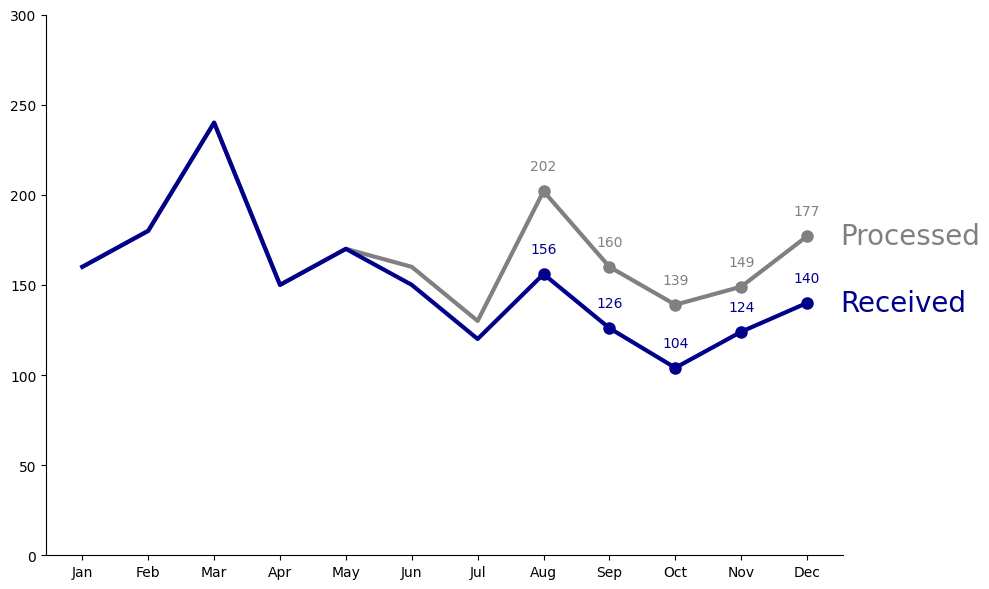

In [128]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
blue_line = [160, 180, 240, 150, 170, 150, 120, 156, 126, 104, 124, 140]
grey_line = [160, 180, 240, 150, 170, 160, 130, 202, 160, 139, 149, 177]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(months, grey_line, color='grey', linestyle='-', linewidth=3, label='Processed')
ax.plot(months, blue_line, color='darkblue', linestyle='-', linewidth=3, label='Received')
ax.grid(False)
ax.set_ylim(0, 300)
ax.set_yticks(range(0, 301, 50))

ax.text(11.5, grey_line[-1], 'Processed', color='grey', fontsize=20, va='center', ha='left')
ax.text(11.5, blue_line[-1], 'Received', color='darkblue', fontsize=20, va='center', ha='left')

for i in range(7, 12):
    ax.text(months[i], grey_line[i] + 10, str(grey_line[i]), color='grey', ha='center', va='bottom', fontsize=10)
    ax.text(months[i], blue_line[i] + 10, str(blue_line[i]), color='darkblue', ha='center', va='bottom', fontsize=10)
    ax.plot(months[i], grey_line[i], marker='o', markersize=8, markerfacecolor='grey', markeredgecolor='grey')
    ax.plot(months[i], blue_line[i], marker='o', markersize=8, markerfacecolor='darkblue', markeredgecolor='darkblue')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()